In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib

In [4]:
import pandas as pd
path="G:\AIE\AIE SEM6\MIS-6\Project\CLUSTERING-OF-AIR-OBJECTS-BASED-ON-TRAJECTORY-and-missile-guidance-system-master\CLUSTERING-OF-AIR-OBJECTS-BASED-ON-TRAJECTORY-and-missile-guidance-system-master\data\FinalTrajPred.csv"
df = pd.read_csv(path)
#del df['v']
del df['t']

In [5]:
flightId = list(set(df.FlightId))
len(flightId)

2127

In [6]:
 from sklearn.model_selection import train_test_split

In [7]:
trainFlight, testFlight = train_test_split(flightId, test_size=0.6, random_state=42)

In [8]:
# flightSize = int(len(flightId)*0.7)
# trainFlight = flightId[:flightSize]
# testFlight  = flightId[flightSize:]

In [9]:
trainDf = df[df.FlightId.isin(trainFlight)].copy()
trainDf.reset_index(inplace = True,drop=True)
testDf = df[df.FlightId.isin(testFlight)].copy()
testDf.reset_index(inplace = True,drop=True)

In [10]:
trainId = trainDf['FlightId'].copy()
testId = testDf['FlightId'].copy()
del trainDf['FlightId']
del testDf['FlightId']

In [11]:
Cols  = list(trainDf.columns)

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
trainDf[Cols] = scaler.fit_transform(trainDf[Cols])
testDf[Cols] = scaler.transform(testDf[Cols])

In [13]:
trainDf.head()

,x,y,z,v
0,0.399771,0.412193,0.000000,0.329317
1,0.399778,0.440124,0.698339,0.329317
2,0.399784,0.441412,0.700690,0.337349
3,0.399791,0.442712,0.703041,0.345382
4,0.399797,0.444013,0.705290,0.353414


In [14]:
testDf.head()

,x,y,z,v
0,0.697006,0.254119,0.707539,0.180723
1,0.695184,0.254080,0.708050,0.180723
2,0.693186,0.253958,0.708459,0.188755
3,0.691095,0.253746,0.708663,0.196787
4,0.689063,0.253430,0.708612,0.200803


In [15]:
#Reshape data for RNN/LSTM
def create_dataset(data, k):
    dataX,dataY = [],[]
    for i in range(data.shape[0] -k):
        x = data[i:i+k,:]
        y = data[i+k,:]
        dataX.append(x)
        dataY.append(y)
    return dataX,dataY

In [16]:
trainDf['fid'] = trainId

In [17]:
testDf['fid'] = testId

In [18]:
trainDf

,x,y,z,v,fid
0,0.399771,0.412193,0.000000,0.329317,0
1,0.399778,0.440124,0.698339,0.329317,0
2,0.399784,0.441412,0.700690,0.337349,0
3,0.399791,0.442712,0.703041,0.345382,0
4,0.399797,0.444013,0.705290,0.353414,0
...,...,...,...,...,...
135265,0.411008,0.451218,0.698799,0.289157,2382
135266,0.409949,0.449235,0.697879,0.289157,2382
135267,0.408884,0.447258,0.696908,0.289157,2382
135268,0.407793,0.445327,0.696090,0.289157,2382


In [19]:
testDf

,x,y,z,v,fid
0,0.697006,0.254119,0.707539,0.180723,2
1,0.695184,0.254080,0.708050,0.180723,2
2,0.693186,0.253958,0.708459,0.188755,2
3,0.691095,0.253746,0.708663,0.196787,2
4,0.689063,0.253430,0.708612,0.200803,2
...,...,...,...,...,...
192844,0.943889,0.637506,0.964426,0.919679,2381
192845,0.950030,0.640745,0.966420,0.919679,2381
192846,0.956138,0.644074,0.968106,0.919679,2381
192847,0.962240,0.647467,0.969589,0.919679,2381


In [20]:
def createDataset(df,look_back):    
    trainX = []
    trainY = []
    fid = list(set(df['fid']))
    # print(fid[:1])
    for flightId in fid:
        tempDf = df[df.fid == flightId].copy()
        del tempDf['fid']
        tempDf.reset_index(drop = True,inplace = True)
        x,y = create_dataset(tempDf.values,look_back)
        trainX.extend(x)
        trainY.extend(y)
    return  trainX,trainY

In [21]:
x,y = createDataset(trainDf,5)
x,y = np.array(x), np.array(y)

In [22]:
x.shape, y.shape

((131020, 5, 4), (131020, 4))

In [23]:
from keras.models import Sequential
from keras.layers import LSSimpleRNN, Dense
from keras import optimizers
from keras.layers import Dense, Flatten, Activation, Dropout
import keras
import tensorflow as tf 


In [24]:
adam = tf.optimizers.Adam()
look_back = 5

In [25]:
x.shape, y.shape

((131020, 5, 4), (131020, 4))

In [73]:
model = Sequential()
# model.add(SimpleRNN(12,input_shape = (look_back, 1),activation='relu'))
model.add(LSTM(12,input_shape = (look_back, 4)))
# model.add(Dropout(0.2))
model.add(Dense(12))
model.add(Dense(4))
model.compile(loss='mean_squared_error',optimizer=adam,metrics=['accuracy'])
model.fit(x,y,epochs = 30 ,batch_size =1000)

NameError: name 'LSTM' is not defined

In [27]:
y_predict = model.predict(x)

In [60]:
from sklearn.metrics import r2_score,explained_variance_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error
import numpy as np

In [29]:
y_predict.shape

(131020, 4)

In [30]:
y.shape

(131020, 4)

In [31]:
y_true = scaler.inverse_transform(y)
y_pred = scaler.inverse_transform(y_predict)

In [49]:
r2_score(y_true,y_pred)

0.9974709646033708

In [33]:
x_test,y_test = createDataset(testDf,5)
x_test,y_test = np.array(x_test), np.array(y_test)

In [50]:
y_true

array([[-13589.,  -8445.,    253.,     90.],
       [-13588.,  -8231.,    305.,     91.],
       [-13587.,  -8014.,    356.,     93.],
       ...,
       [ -2138.,   2064.,     66.,     64.],
       [ -1894.,   1857.,     51.,     64.],
       [ -1647.,   1652.,     39.,     64.]])

In [51]:
y_pred

array([[ 3.6462848e+04, -3.6974559e+04,  2.6496167e+03,  6.3577763e+01],
       [-1.3320390e+04, -9.8427988e+03,  1.7631511e+02,  9.1277679e+01],
       [-1.3674979e+04, -9.3472188e+03,  2.2420601e+02,  9.2128021e+01],
       ...,
       [-2.0606724e+03,  2.1540432e+03,  2.2974915e+01,  6.3286110e+01],
       [-1.8028981e+03,  1.9670627e+03,  4.0713835e+00,  6.3304523e+01],
       [-1.5451237e+03,  1.7834241e+03, -1.6937077e+01,  6.3308765e+01]],
      dtype=float32)

In [34]:
y_test_pred = model.predict(x_test)

In [35]:
y_true1 = scaler.inverse_transform(y_test)
y_pred1 = scaler.inverse_transform(y_test_pred)


In [62]:
print("r2 score:" ,r2_score(y_true1,y_pred1))

r2 score: 0.9974725306860537


In [66]:
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_true1,y_pred1)))

Root Mean squared error: 979.6269521532449


In [67]:
print("Explained Variance Score:", explained_variance_score(y_true1,y_pred1))

Explained Variance Score: 0.997479313284615


In [71]:
print("Mean Absolute Error:", mean_absolute_error(y_true1,y_pred1))

Mean Absolute Error: 529.5506124280479


In [72]:
print("Mean absolute error:", median_absolute_error(y_true1,y_pred1))

Mean absolute error: 443.9003963470445


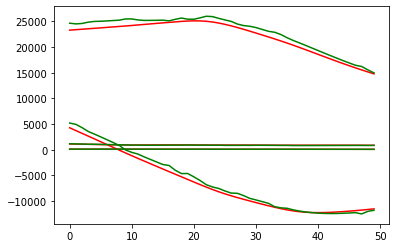

In [37]:
a, b= y_true1[110:160,:],y_pred1[110:160,:]
import matplotlib.pyplot as plt
plt.plot(a,c='r')
plt.plot(b,c='g')
plt.show()

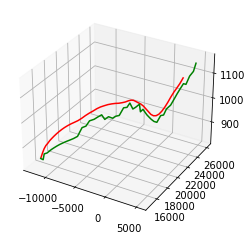

In [38]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax= plt.axes(projection="3d")
ax.plot3D(a[:,0],a[:,1],a[:,2],c='r')
ax.plot3D(b[:,0],b[:,1],b[:,2],c='g')
plt.show()

In [39]:
b . shape

(50, 4)

In [40]:
testDf

,x,y,z,v,fid
0,0.697006,0.254119,0.707539,0.180723,2
1,0.695184,0.254080,0.708050,0.180723,2
2,0.693186,0.253958,0.708459,0.188755,2
3,0.691095,0.253746,0.708663,0.196787,2
4,0.689063,0.253430,0.708612,0.200803,2
...,...,...,...,...,...
192844,0.943889,0.637506,0.964426,0.919679,2381
192845,0.950030,0.640745,0.966420,0.919679,2381
192846,0.956138,0.644074,0.968106,0.919679,2381
192847,0.962240,0.647467,0.969589,0.919679,2381


In [41]:
joblib.dump(scaler, 'scaler_plane.pkl')

['scaler_plane.pkl']

In [42]:
from collections import deque
def predictValus(x,look_back,lenPred):
  global model
  pred = []
  pred.extend(list(x))
  x = deque(x)
  assert(len(x) == look_back)
  for i in range(lenPred):
    x_prime = model.predict(np.array(x).reshape((1,look_back,3)))
    x.append(x_prime)
    x.popleft()
    x.append(x_prime)
  return x

In [43]:
architecture = model.to_json()
#saving the jason file in system(on the hard disk)
with open("architecture_plane.json", "w") as json_file:
    json_file.write(architecture)
  #now we are saving the trained weights
model.save_weights("weights_plane.h5")